In [ ]:
import numpy as np              # linear algebra
import pandas as pd             # data processing, CSV file I/O (e.g. pd.read_csv)
import os                       # files handling
import re
from PIL import Image
from random import randint, seed
from IPython.display import display
import matplotlib.pyplot as plt
import json
import warnings
import requests
import seaborn as sns
warnings.filterwarnings('ignore')

In [ ]:
cv2.imread(os.path.join("/content", "521671.jpg"))

In [ ]:
from sklearn.preprocessing import LabelEncoder
import cv2
import os
import numpy as np
import pandas as pd

def load_jpeg_images(path):
    image_files = [f for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.jpeg')]
    images = []
    ids = []
    label_encoder = LabelEncoder()

    for file in image_files:
        ids.append(os.path.splitext(file)[0])
        image = cv2.imread(os.path.join(path, file))
        img = cv2.resize(image, (240, 240))
        images.append(img)

    df_images = pd.DataFrame({"ids": ids, "img": images})
    df_target = pd.read_csv("/content/champignons.csv")
    df_target["label_encode"] = label_encoder.fit_transform(df_target["label"])
    df_images["ids"] = df_images["ids"].astype(int)

    df = pd.merge(df_images, df_target[["image_id","label" , "label_encode"]], left_on='ids', right_on='image_id')
    images_array = np.array(images)
    target_array = np.array(df[['label_encode']])
    return images_array, target_array[:-1].copy()

images, target = load_jpeg_images("/content")

In [ ]:
target = np.eye(10)[target.reshape(-1)]

# Séparation des données Train/Test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, target, test_size = 0.2 , shuffle=True, random_state=123)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 119, 119, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 117, 117, 64)      18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 58, 58, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 56, 56, 64)        36928     
                                                                 
 flatten_13 (Flatten)        (None, 200704)          

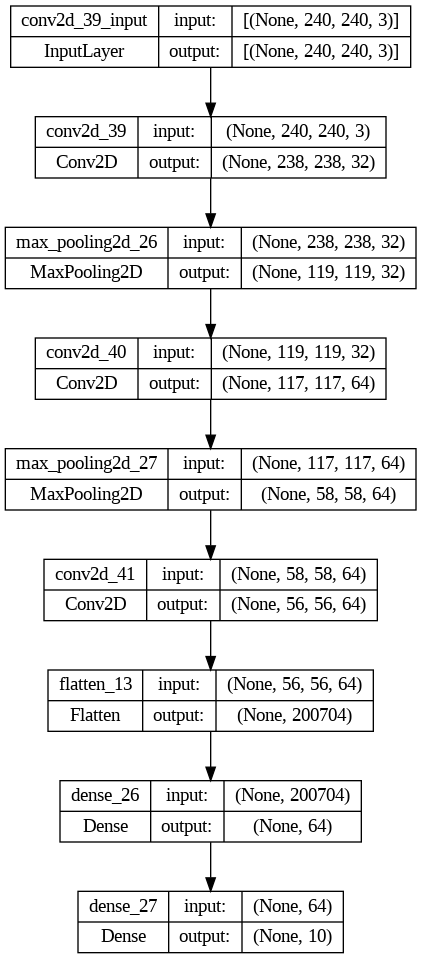

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils.vis_utils import plot_model

import tensorflow as tf

# Définir le modèle
model = tf.keras.models.Sequential([
  # Couche de convolution 1
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(240, 240, 3)),
  tf.keras.layers.MaxPooling2D((2,2)),
  # Couche de convolution 2
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  # Couche de convolution 3
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.Flatten(),
  # Couche dense 1
  tf.keras.layers.Dense(64, activation='relu'),
  # Couche de sortie
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()

# visualisation du modèle
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
def analyze_model(model, X_test, y_test, train_hist, epochs_nb=20):
    score = model.evaluate(X_test, y_test)
    print(f"Test loss: {score[0]}")
    print(f"Test accuracy: {score[1]}")
    
    y_pred = model.predict(X_test)
    y_pred_class = np.argmax(y_pred, axis=1)
    y_test_class = np.argmax(y_test, axis=1)
    error = 100*np.mean(y_pred_class != y_test_class)
    print(f"Error: {error:.2f}%")
    
    train_acc = train_hist.history['accuracy']
    val_acc = train_hist.history['val_accuracy']
    epo = range(1, epochs_nb+1)
    plt.plot(epo, train_acc, label='Training accuracy')
    plt.plot(epo, val_acc, label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
training_history = model.fit(X_train, y_train, batch_size=200, epochs=10, verbose=1, validation_split=0.2)
analyze_model(model, X_test, y_test, training_history , epochs_nb=10)

InternalError: ignored

In [ ]:
import itertools

def print_nice_conf_matrix(y, cnf_matrix):
    '''
    Fonction dediee a rendre une jolie matrice de confusion a partir de :
        - y : un array contenant les classes pour la classification. 
               Sert uniquement a compter le nombre de classes.
        - cnf_matrix : la matrice de confusion qui nous interesse.
    '''
    classes = range(0,(len(np.unique(y))))

    plt.figure()

    plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
    plt.title("Matrice de confusion")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment = "center",
                 color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

    plt.ylabel('Vrais labels')
    plt.xlabel('Labels prédits')
    plt.show()